## Importing the Libraries

In [4]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,MaxPool2D, Dense, Dropout
from tensorflow.keras import callbacks
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

## Loading the Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Identifying Labels

In [3]:
labels = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

## Building the Neural Network

In [40]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [41]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 8, 8, 128)        

## Defining a custom callback 

In [7]:
class Callback(callbacks.Callback):
    def on_epoch_end(self,epoch,logs= {}):
        if logs.get('accuracy')>0.95:
            self.model.stop_training =True
            print('Stopping Training')
call = Callback()
        
#model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics =['accuracy'])
#history = model.fit(x_train,y_train,epochs = 20,callbacks=[call], validation_data=(x_test,y_test),steps_per_epoch=1000)

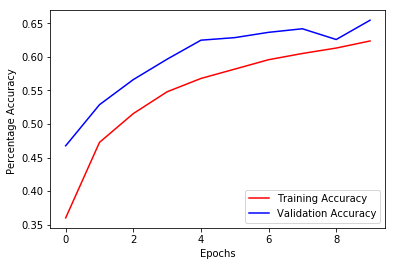

In [24]:
accuracy= history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss= history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'r-',label = 'Training Accuracy')
plt.plot(epochs,val_accuracy,'b-',label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Percentage Accuracy ')
plt.legend()

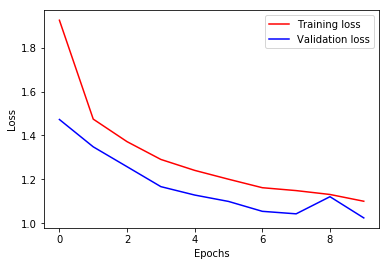

In [25]:
plt.plot(epochs,loss,'r-',label = 'Training loss')
plt.plot(epochs,val_loss,'b-',label = 'Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

## Retraining the model for more epochs

In [8]:
model = load_model('cnn_cifar10.h5')
history = model.fit(x_train,y_train,epochs = 10,callbacks=[call], validation_data=(x_test,y_test),steps_per_epoch=1000)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 176s 4ms/sample - loss: 0.5141 - accuracy: 0.8198 - val_loss: 0.8978 - val_accuracy: 0.7263
Epoch 2/10
50000/50000 [==============================] - 177s 4ms/sample - loss: 0.4777 - accuracy: 0.8318 - val_loss: 0.9932 - val_accuracy: 0.7174
Epoch 3/10
50000/50000 [==============================] - 179s 4ms/sample - loss: 0.4526 - accuracy: 0.8421 - val_loss: 1.0018 - val_accuracy: 0.7120
Epoch 4/10
50000/50000 [==============================] - 171s 3ms/sample - loss: 0.4106 - accuracy: 0.8558 - val_loss: 1.0207 - val_accuracy: 0.7170
Epoch 5/10
50000/50000 [==============================] - 168s 3ms/sample - loss: 0.3836 - accuracy: 0.8658 - val_loss: 1.0427 - val_accuracy: 0.7235
Epoch 6/10
50000/50000 [==============================] - 164s 3ms/sample - loss: 0.3689 - accuracy: 0.8722 - val_loss: 1.0894 - val_accuracy: 0.7137
Epoch 7/10
50000/50000 [==========================

## Plotting training and validation accuracies and training and validation losses

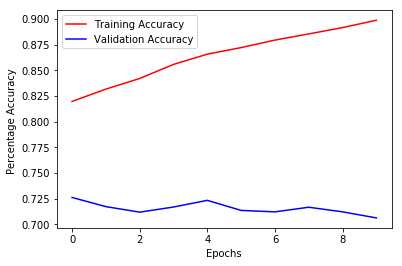

In [9]:
accuracy= history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss= history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'r-',label = 'Training Accuracy')
plt.plot(epochs,val_accuracy,'b-',label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Percentage Accuracy ')
plt.legend()

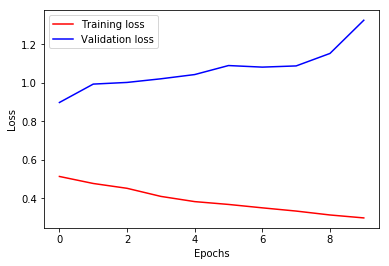

In [10]:
plt.plot(epochs,loss,'r-',label = 'Training loss')
plt.plot(epochs,val_loss,'b-',label = 'Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### This shows that the model overfit !

### Conclusively we have about 73% accuracy on the validation data